## Model Training

#### 1.1 Import Data and Required Packages
##### Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import warnings

In [3]:
df = pd.read_csv('StudentsPerformanceData.csv')

In [4]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


####  X and Y variable preparation

In [5]:
X = df.drop(columns=['math_score'],axis=1)

In [6]:
X.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [7]:
variables = [
    ("gender", "Categories in 'gender' variable:"),
    ("race_ethnicity", "Categories in 'race_ethnicity' variable:"),
    ("parental_level_of_education", "Categories in 'parental level of education' variable:"),
    ("lunch", "Categories in 'lunch' variable:"),
    ("test_preparation_course", "Categories in 'test preparation course' variable:")
]

for column, message in variables:
    print(f"{message:<60} {df[column].unique()}")


Categories in 'gender' variable:                             ['female' 'male']
Categories in 'race_ethnicity' variable:                     ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental level of education' variable:        ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:                              ['standard' 'free/reduced']
Categories in 'test preparation course' variable:            ['none' 'completed']


In [8]:
y = df['math_score']

In [9]:
y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math_score, Length: 1000, dtype: int64

In [10]:
# Identifying feature types based on their data type
numerical_features = X.select_dtypes(exclude="object").columns
categorical_features = X.select_dtypes(include="object").columns

# Defining the transformers
numeric_transform = ("StandardScaler", StandardScaler(), numerical_features)
categorical_transform = ("OneHotEncoder", OneHotEncoder(), categorical_features)

# Building the ColumnTransformer
transformers_list = [categorical_transform, numeric_transform]
preprocessor = ColumnTransformer(transformers_list)


In [11]:
X = preprocessor.fit_transform(X)

In [12]:
X.shape

(1000, 19)

In [13]:

# Splitting the dataset into training and testing sets
split_params = {
    'test_size': 0.2,
    'random_state': 42
}
X_train, X_test, y_train, y_test = train_test_split(X, y, **split_params)

# Displaying the shapes of the train and test sets
X_train.shape, X_test.shape


((800, 19), (200, 19))

#### Define a function to provide all evaluation metrics post model training.

In [14]:
# Evaluation function
def evaluate(true_values, predicted_values):
    # Calculate Mean Absolute Error (MAE)
    mae_val = mean_absolute_error(true_values, predicted_values)
    
    # Calculate Mean Squared Error (MSE)
    mse_val = mean_squared_error(true_values, predicted_values)
    
    # Calculate Root Mean Squared Error (RMSE)
    rmse_val = np.sqrt(mse_val)
    
    # Calculate R-squared (R2) score
    r2_val = r2_score(true_values, predicted_values)
    
    # Return evaluation metrics
    return mae_val, rmse_val, r2_val

# Dictionary of regression models
regressors = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}

# Lists to store model names and R-squared scores
model_names = []
r2_scores = []

# Iterate through, train, predict, and evaluate models
for name, model in regressors.items():
    # Train the model on the training data
    model.fit(X_train, y_train)

    # Predict on both training and test data
    y_preds_train = model.predict(X_train)
    y_preds_test = model.predict(X_test)

    # Evaluate the model using the evaluation function
    train_mae, train_rmse, train_r2 = evaluate(y_train, y_preds_train)
    test_mae, test_rmse, test_r2 = evaluate(y_test, y_preds_test)
    
    # Display results for the current model
    print(name)
    model_names.append(name)
    
    # Training set performance
    print('Model performance for Training set')
    print(f"- Root Mean Squared Error: {train_rmse:.4f}")
    print(f"- Mean Absolute Error: {train_mae:.4f}")
    print(f"- R2 Score: {train_r2:.4f}")
    
    # Test set performance
    print('----------------------------------')
    print('Model performance for Test set')
    print(f"- Root Mean Squared Error: {test_rmse:.4f}")
    print(f"- Mean Absolute Error: {test_mae:.4f}")
    print(f"- R2 Score: {test_r2:.4f}")
    
    # Append the R2 score to the list
    r2_scores.append(test_r2)
    
    print('='*35)
    print('\n')


Linear Regression
Model performance for Training set
- Root Mean Squared Error: 5.3244
- Mean Absolute Error: 4.2671
- R2 Score: 0.8743
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.3960
- Mean Absolute Error: 4.2158
- R2 Score: 0.8803


Lasso
Model performance for Training set
- Root Mean Squared Error: 6.5938
- Mean Absolute Error: 5.2063
- R2 Score: 0.8071
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 6.5197
- Mean Absolute Error: 5.1579
- R2 Score: 0.8253


Ridge
Model performance for Training set
- Root Mean Squared Error: 5.3233
- Mean Absolute Error: 4.2650
- R2 Score: 0.8743
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.3904
- Mean Absolute Error: 4.2111
- R2 Score: 0.8806

K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 5.7077
- Mean Absolute Error: 4.5167
- R2 Score: 0.8555
------------------------

### Results

In [15]:
pd.DataFrame(list(zip(model_names, r2_scores)), columns=['Model', 'R^2 Score']).sort_values(by="R^2 Score", ascending=False)

,Model,R^2 Score
2,Ridge,0.880593
0,Linear Regression,0.880345
5,Random Forest Regressor,0.855096
7,CatBoosting Regressor,0.851632
8,AdaBoost Regressor,0.843313
6,XGBRegressor,0.827797
1,Lasso,0.825320
3,K-Neighbors Regressor,0.783813
4,Decision Tree,0.732307


## Linear Regression

In [16]:
# Evaluation function
def evaluate(true_values, predicted_values):
    # Calculate Mean Absolute Error (MAE)
    mae_val = mean_absolute_error(true_values, predicted_values)
    
    # Calculate Mean Squared Error (MSE)
    mse_val = mean_squared_error(true_values, predicted_values)
    
    # Calculate Root Mean Squared Error (RMSE)
    rmse_val = np.sqrt(mse_val)
    
    # Calculate R-squared (R2) score
    r2_val = r2_score(true_values, predicted_values)
    
    # Return evaluation metrics
    return mae_val, rmse_val, r2_val

# Dictionary of regression models
regressors = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}

# Lists to store model names and R-squared scores
model_names = []
r2_scores = []

# Iterate through, train, predict, and evaluate models
for name, model in regressors.items():
    # Train the model on the training data
    model.fit(X_train, y_train)

    # Predict on both training and test data
    y_preds_train = model.predict(X_train)
    y_preds_test = model.predict(X_test)

    # Evaluate the model using the evaluation function
    train_mae, train_rmse, train_r2 = evaluate(y_train, y_preds_train)
    test_mae, test_rmse, test_r2 = evaluate(y_test, y_preds_test)
    
    # Display results for the current model
    print(name)
    model_names.append(name)
    
    # Training set performance
    print('Model performance for Training set')
    print(f"- Root Mean Squared Error: {train_rmse:.4f}")
    print(f"- Mean Absolute Error: {train_mae:.4f}")
    print(f"- R2 Score: {train_r2:.4f}")
    
    # Test set performance
    print('----------------------------------')
    print('Model performance for Test set')
    print(f"- Root Mean Squared Error: {test_rmse:.4f}")
    print(f"- Mean Absolute Error: {test_mae:.4f}")
    print(f"- R2 Score: {test_r2:.4f}")
    
    # Append the R2 score to the list
    r2_scores.append(test_r2)
    
    print('='*35)
    print('\n')


Linear Regression
Model performance for Training set
- Root Mean Squared Error: 5.3244
- Mean Absolute Error: 4.2671
- R2 Score: 0.8743
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.3960
- Mean Absolute Error: 4.2158
- R2 Score: 0.8803


Lasso
Model performance for Training set
- Root Mean Squared Error: 6.5938
- Mean Absolute Error: 5.2063
- R2 Score: 0.8071
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 6.5197
- Mean Absolute Error: 5.1579
- R2 Score: 0.8253


Ridge
Model performance for Training set
- Root Mean Squared Error: 5.3233
- Mean Absolute Error: 4.2650
- R2 Score: 0.8743
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.3904
- Mean Absolute Error: 4.2111
- R2 Score: 0.8806


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 5.7077
- Mean Absolute Error: 4.5167
- R2 Score: 0.8555
-----------------------

## ## Visualize predicted vs actual values


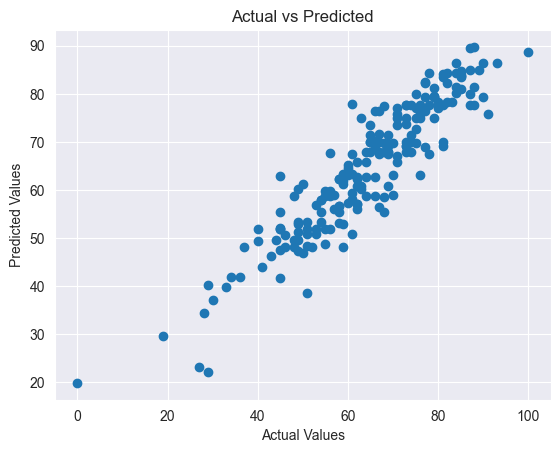

In [18]:
# Scatter plot to visualize actual vs. predicted values
plt.scatter(y_test, y_preds_test)  # Use 'y_preds_test' instead of 'y_pred'
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted')
plt.show()


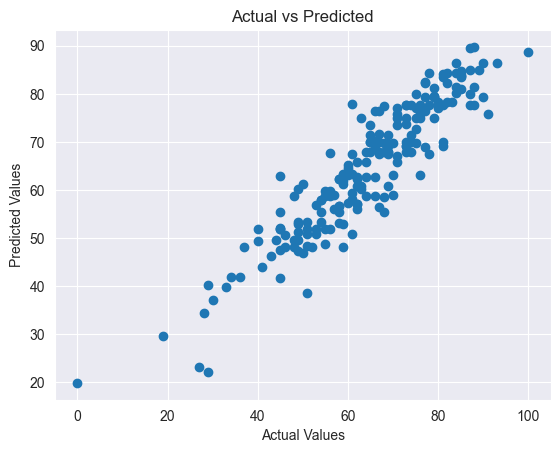

In [20]:
# Scatter plot to visualize actual vs. predicted values
plt.scatter(y_test, y_preds_test)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted')
plt.show()


#### Difference between Actual and Predicted Values

In [22]:
# Create a DataFrame to compare actual and predicted values
pred_df = pd.DataFrame({
    'Actual Value': y_test,
    'Predicted Value': y_preds_test,  # Replace 'y_preds_test' with the correct variable name
    'Difference': y_test - y_preds_test  # Replace 'y_preds_test' with the correct variable name
})

# Display the DataFrame
pred_df


,Actual Value,Predicted Value,Difference
521,91,75.768041,15.231959
737,53,56.969466,-3.969466
740,80,77.722222,2.277778
660,74,77.686275,-3.686275
411,84,84.329787,-0.329787
...,...,...,...
408,52,48.107639,3.892361
332,62,56.073171,5.926829
208,74,67.917949,6.082051
613,65,67.917949,-2.917949
